In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [139]:
df=pd.read_csv(r"C:\Users\youssef azam\Desktop\netflix1.csv")
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## EDA

In [140]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [141]:
df.shape

(8790, 10)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [143]:
m_year=df.release_year .max()
min_year=df.release_year .min()
print("Max year is = ",m_year,"\n min year is = ",min_year)

Max year is =  2021 
 min year is =  1925


In [144]:
df.show_id.count()

8790

In [145]:
t=df["type"].value_counts()
print("type of flime  is = ",t)

type of flime  is =  Movie      6126
TV Show    2664
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

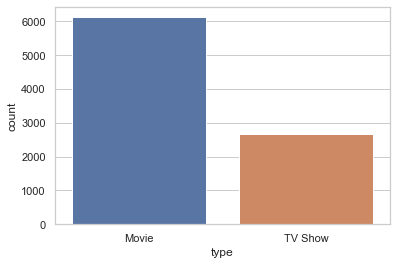

In [146]:
sns.countplot(data=df, x='type')

In [147]:
t=df["director"].value_counts()
print("min of dirctor ",t[-1])
print("max of dirctor ",t.max())

min of dirctor  1
max of dirctor  2588


In [148]:
df.country.value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [149]:
labels=df.release_year.value_counts()
labels

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [150]:
df.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [151]:
d_c=df.groupby(['country'])[['director']].count()
print("group by country by director  ",d_c)

group by country by director                 director
country               
Argentina           76
Australia          114
Austria              9
Bangladesh           3
Belarus              1
...                ...
Uruguay              9
Venezuela            2
Vietnam              7
West Germany         1
Zimbabwe             1

[86 rows x 1 columns]


array([[<AxesSubplot:title={'center':'director'}>]], dtype=object)

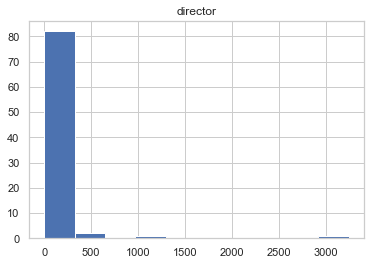

In [152]:
d_c.hist()

In [153]:
gkk = df.groupby(['listed_in'])[['type']].count()
gkk

,type
listed_in,
Action & Adventure,128
"Action & Adventure, Anime Features",1
"Action & Adventure, Anime Features, Children & Family Movies",4
"Action & Adventure, Anime Features, Classic Movies",2
"Action & Adventure, Anime Features, Horror Movies",1
...,...
"TV Horror, TV Mysteries, Teen TV Shows",1
"TV Horror, Teen TV Shows",2
"TV Sci-Fi & Fantasy, TV Thrillers",1


In [156]:
dr = df.groupby(['duration'])[['rating']].count()
dr

,rating
duration,
1 Season,1791
10 Seasons,6
10 min,1
100 min,108
101 min,116
...,...
95 min,137
96 min,130
97 min,146


In [157]:
x=df.groupby(['type','listed_in'])[['release_year']].count()

In [158]:
li=df.listed_in.value_counts()
print(li)
print("+++++++++++++++++++++++++++++++++++++++++++++")
print("max of listed in ",li.max()," \n min is equal = ",li.min())

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: listed_in, Length: 513, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++
max of listed in  362  
 min is equal =  1


## cleaning

In [159]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [160]:
df.duplicated().sum()

0

## vis

array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

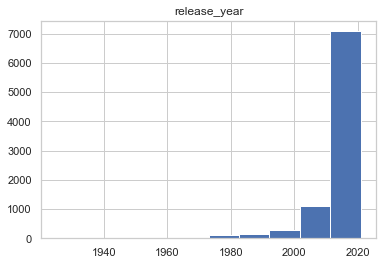

In [161]:
df.hist()

In [162]:
df.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


Text(0, 0.5, 'Count')

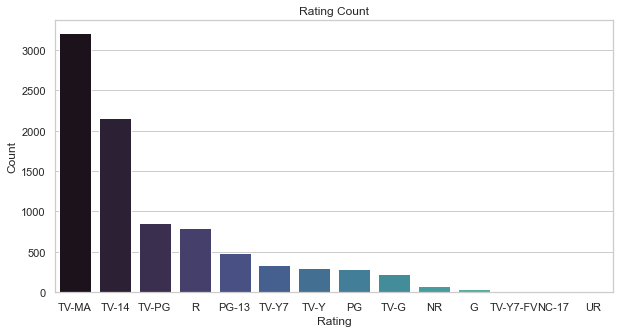

In [163]:
ax = plt.subplots(figsize = (10,5))
sns.set_theme(style="whitegrid")

ax = sns.countplot(x=df['rating'], 
              palette="mako", 
              order = df['rating'].value_counts().index, 
              data=df)

ax.set_title('Rating Count')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

<AxesSubplot:xlabel='count', ylabel='rating'>

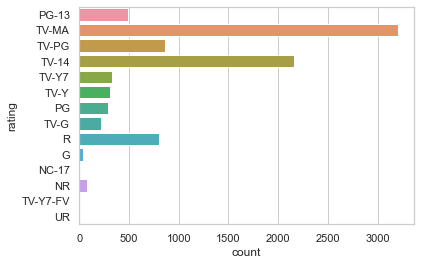

In [164]:
sns.countplot(data = df ,y = df['rating'])

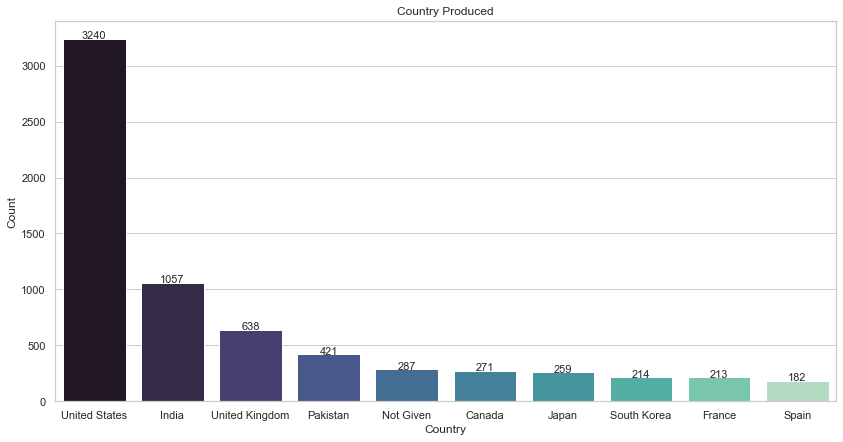

In [165]:
countplt, ax = plt.subplots(figsize = (14,7))
ax = sns.countplot(x=df['country'],
                   order = df['country'].value_counts().head(10).index, 
                   palette='mako')

ax.set_title('Country Produced')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,
             rect.get_height()+ 0.75,
             rect.get_height(),
             horizontalalignment='center',
             fontsize = 11)

## Thank you